In [1]:
import cv2, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TODO
# automatic boundary detection
# https://towardsdatascience.com/document-scanner-using-computer-vision-opencv-and-python-20b87b1cbb06

In [3]:
# img = cv2.imread('sudoku-flat.png', 0)
img = cv2.imread('sudoku.jpg', 0)

In [4]:
# Resizing Image (max dim = size)
size = 640
def resize(img, max_dim=640):
    h, w = img.shape[:2]
    if h > w:
        hnew = size
        wnew = (size*w)//h
    else:
        wnew = size
        hnew = (size*h)//w

    img = cv2.resize(img, (wnew, hnew))
    return img

In [5]:
def birdsEye(img, corners=[]):
    if len(corners) == 4:
        corners = np.float32(corners)
        M = cv2.getPerspectiveTransform(corners,np.float32([[0,0],[size,0],[size,size],[0,size]]))
        cropped = cv2.warpPerspective(img,M,(size,size))
    elif len(corners) == 0:
        cropped = img.copy()
    return cropped

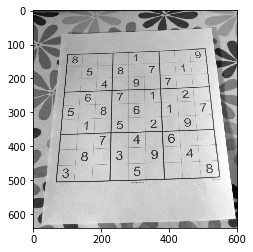

In [6]:
img = resize(img, size)
plt.imshow(img, cmap='gray')

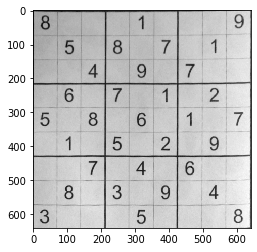

In [7]:
corners = [[102, 129], [504, 114], [548, 489], [69, 503]]
# corners = []

cropped = birdsEye(img, corners)
plt.imshow(cropped, cmap='gray')

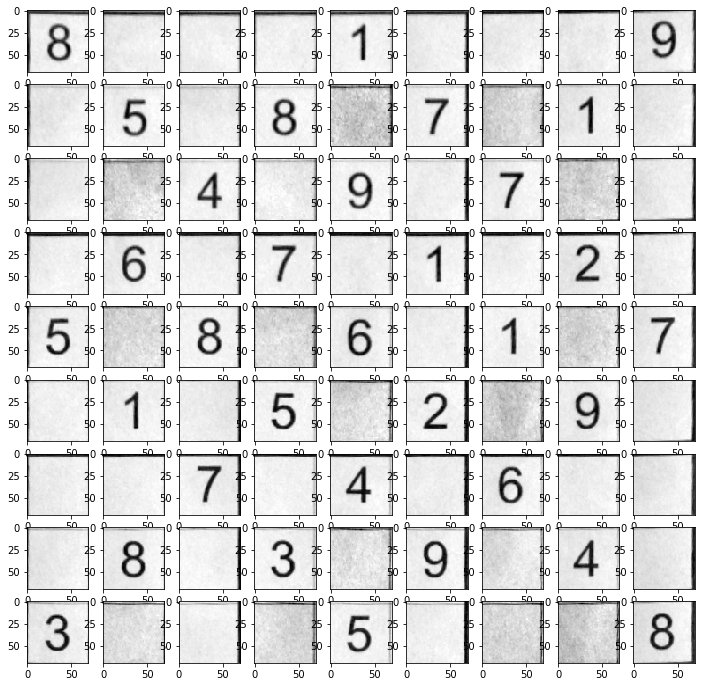

In [8]:
region_1d = [(i*70+i+i//3, (i+1)*70+i+i//3) for i in range(9)]
region_2d = [(x, y) for x in region_1d for y in region_1d]

fig, ax = plt.subplots(9, 9, figsize=(12, 12))

nums = []

for i, dim in enumerate(region_2d):
    p, q = dim
    x1, x2 = p
    y1, y2 = q
    num_i = cropped[x1:x2, y1:y2]
    nums.append(num_i)
    ax[i//9][i%9].imshow(num_i,cmap='gray')

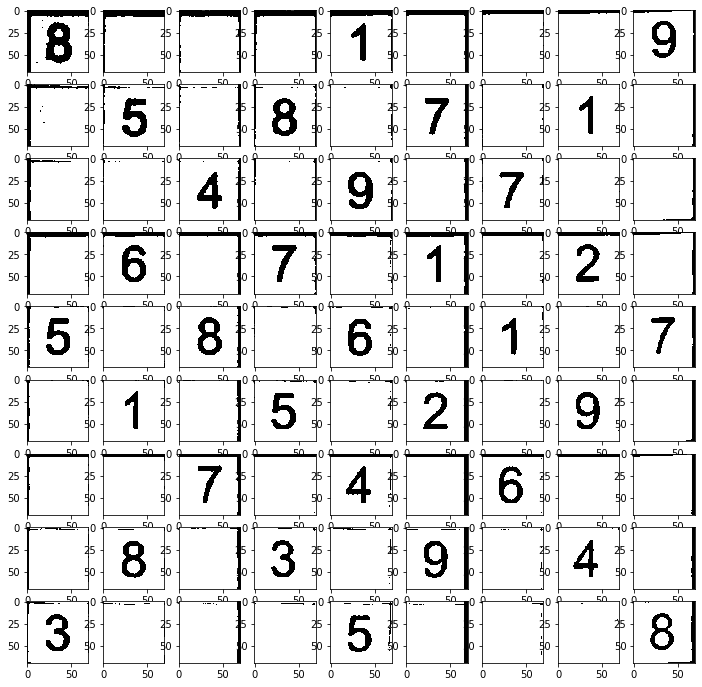

In [9]:
fig, ax = plt.subplots(9, 9, figsize=(12, 12))
for i, num_i in enumerate(nums):
    ret, temp = cv2.threshold(num_i, 160, 255, cv2.THRESH_BINARY)
    ax[i//9][i%9].imshow(temp,cmap='gray')

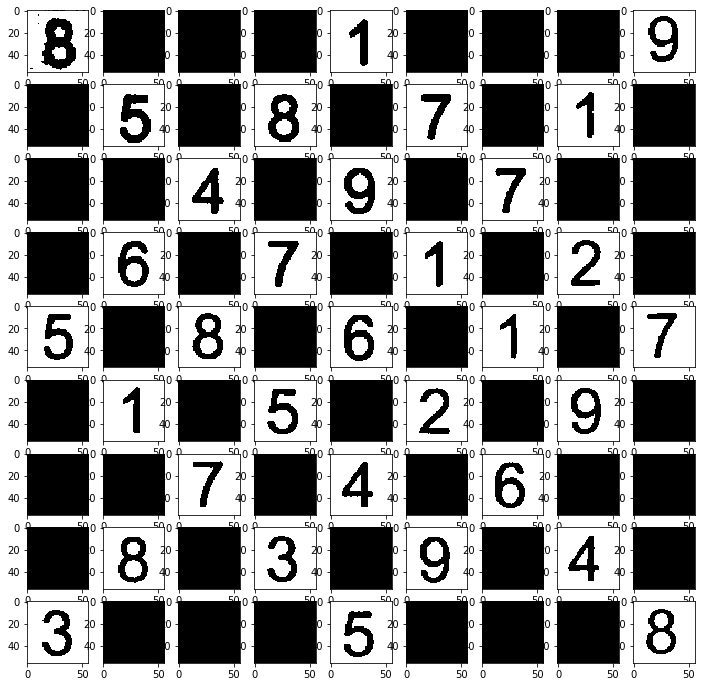

In [23]:
sudoku = []
fig, ax = plt.subplots(9, 9, figsize=(12, 12))
crop_size = 7
mn_th = 240
for i, num_i in enumerate(nums):
    ret, temp = cv2.threshold(num_i, 160, 255, cv2.THRESH_BINARY)
    num_cr = temp[crop_size:-crop_size, crop_size:-crop_size]
    mn = num_cr.mean()
    if mn < mn_th:
        sudoku.append(model.predict_classes(cv2.resize(num_cr, (28, 28)).reshape(1, 28, 28, 1))[0])
        ax[i//9][i%9].imshow(num_cr,cmap='gray')
    else:
        sudoku.append(' ')
        ax[i//9][i%9].imshow(255*np.ones((56, 56)),cmap='gray')

In [14]:
from keras.models import load_model

In [15]:
model = load_model('E:/Models/Lens/lens-digi-1.h5')

In [33]:
print('', *['-']*9, sep='+', end="+\n")
for i in range(9):
    print('', *sudoku[i*9:(i+1)*9], sep='|', end="|\n")
    print('', *['-']*9, sep='+', end="+\n")

+-+-+-+-+-+-+-+-+-+
|8| | | |1| | | |3|
+-+-+-+-+-+-+-+-+-+
| |5| |8| |7| |1| |
+-+-+-+-+-+-+-+-+-+
| | |4| |9| |7| | |
+-+-+-+-+-+-+-+-+-+
| |5| |7| |1| |2| |
+-+-+-+-+-+-+-+-+-+
|5| |8| |5| |1| |1|
+-+-+-+-+-+-+-+-+-+
| |1| |5| |2| |9| |
+-+-+-+-+-+-+-+-+-+
| | |1| |4| |5| | |
+-+-+-+-+-+-+-+-+-+
| |8| |3| |9| |4| |
+-+-+-+-+-+-+-+-+-+
|3| | | |5| | | |8|
+-+-+-+-+-+-+-+-+-+
